# Using R with pyABC

In [1]:
%matplotlib inline

In [2]:
from pyabc.external import R

r = R("myRModel.R")
r.display_source_ipython()

In [3]:
model = r.model("myModel")
distance = r.distance("myDistance")
sum_stat = r.summary_statistics("mySummaryStatistics")

In [4]:
from pyabc import Distribution, RV, ABCSMC

prior = Distribution(meanX=RV("uniform", 0, 10),
                     meanY=RV("uniform", 0, 10))
abc = ABCSMC(model, prior, distance,
             summary_statistics=sum_stat)

In [5]:
import os
from tempfile import gettempdir

db = "sqlite:///" + os.path.join(gettempdir(), "test.db")
abc.new(db, r.observation("observation"))

INFO:Epsilon:initial epsilon is 4.387906144997348
INFO:History:Start <ABCSMC(id=33, start_time=2017-07-26 14:42:00.951718, end_time=None)>


33

In [6]:
history = abc.run(minimum_epsilon=0.5, max_nr_populations=8)

INFO:ABC:t:0 eps:4.387906145
INFO:ABC:t:1 eps:2.965792624791438
INFO:ABC:t:2 eps:2.0248618232582114
INFO:ABC:t:3 eps:1.4421255113030536
INFO:ABC:t:4 eps:1.0023256513103962
INFO:ABC:t:5 eps:0.7650194574360264
INFO:ABC:t:6 eps:0.5445583498580935
INFO:ABC:t:7 eps:0.37670360235650036
INFO:History:Done <ABCSMC(id=33, start_time=2017-07-26 14:42:00.951718, end_time=2017-07-26 14:42:12.747630)>


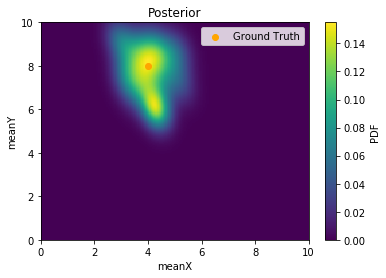

In [7]:
from pyabc.visualization import plot_hist_2d

df, w = abc.history.get_distribution(0)
ax = plot_hist_2d(df, w, "meanX", "meanY",
                  xmin=0, xmax=10,
                  ymin=0, ymax=10,
                  numx=200, numy=200)
ax.scatter([4], [8], color="orange", label="Ground Truth");
ax.legend();